In [1]:
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer
import nltk
# nltk.download('punkt_tab')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [2]:
# df_train_sen, df_test_sen = train_test_split(df_sentiment, test_size=0.2, random_state=42, stratify=df_sentiment['Sentiment'] )
df_train_sen = pd.read_csv('C:/Users/tien_/OneDrive/SMU/ISSS609-G1-Text Analytics and Applications/GroupProject/train_sen.csv')
df_test_sen = pd.read_csv('C:/Users/tien_/OneDrive/SMU/ISSS609-G1-Text Analytics and Applications/GroupProject/test_sen.csv')
print("Train set size:", df_train_sen.shape)
print("Test set size:", df_test_sen.shape)

Train set size: (90907, 13)
Test set size: (22727, 13)


In [3]:
print("Column names:", df_train_sen.columns)
print("Column names:", df_test_sen.columns)

Column names: Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'review_length_raw', 'length_category', 'Sentiment'],
      dtype='object')
Column names: Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'review_length_raw', 'length_category', 'Sentiment'],
      dtype='object')


In [4]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{"they're", 'those', 'yours', 'are', "they've", 'more', 'were', "you'd", 'couldn', 'himself', "she's", 'here', 'its', "shouldn't", 'i', 'any', 'what', 'yourself', "you'll", 'not', "couldn't", 'hers', 'nor', 'will', 'm', "shan't", 'yourselves', "mightn't", 'mustn', "we'd", 'between', "haven't", 't', 'own', 'at', "don't", 'itself', "we've", 'by', "i'm", 'who', 'some', "hasn't", 'our', 'in', 'herself', 'further', 'them', "it's", 'down', 'had', 'ma', 'she', 'whom', 'doing', "wasn't", 'when', "he's", "it'll", "hadn't", 'ain', 'or', 'haven', 'he', 'shouldn', 'themselves', 'into', 'under', 's', "aren't", 'can', 'hadn', "she'll", 'did', 'against', 'doesn', 'as', 'over', "she'd", 'of', 'aren', 'mightn', "i'll", 'you', 'has', 'ourselves', 'theirs', 'her', "we're", 'too', 'an', 'be', 'myself', 'ours', 'am', 'being', 'below', 'o', 'same', 'on', 'didn', 'through', 'to', 'we', "they'd", "isn't", "wouldn't", 'very', 'both', 'each', 'for', 'wouldn', 'my', 'a', 'about', 'once', 'needn', 'the', 'it', 'i

- Text Preprocessing Pipeline

In [6]:
ascii_emoticon_pattern = re.compile(
    r'\b(?:'
    r'8[\-]?[)D\]\[(pPO]|'       
    r'=[\-]?[)D\]\[(pPoO0]|'     
    r'[:;xX][\-]?[)D\]\[(pPoO0]'
    r')'
)

emoticon_map = {
    "8-O":  "coolShockFace",
    "8)":   "coolSmileFace",
    ":)":   "smileFace",
    ";)":   "winkFace",
    ":0":   "shockFace",
    ":D":   "grinFace",
    ":[":   "confusedFace",
    ";o":   "winkOpenMouthFace",
    ":(":   "sadFace",
    ";D":   "winkGrinFace",
    ":-)":  "smileFace",
    "Xp":   "xTongueFace",
    "8p":   "coolTongueFace",
    "X)":   "xSmileFace",
    ":O":   "shockFace",
    ":P":   "tongueFace",
    "=o":   "shockFace",
    "XD":   "bigGrinFace",
    "8-(":  "coolSadFace",
    "Xo":   "ShockFace",
    ":p":   "tongueFace",
    "8O":   "coolShockFace",
    "x)":   "SmileFace",
    "8-p":  "coolTongueFace",
    "=p":   "tongueFace",
    ";[":   "winkConfusedFace",
    ";p":   "winkTongueFace",
    "XP":   "bigXGrinFace",
    "XO":   "ShockFace",
    ";0":   "winkShockFace",
    ";(":   "sadWinkFace",
    "=P":   "tongueFace",
    ":-(":  "sadFace",
    ";]":   "winkSmileFace",
    "8]":   "coolSmileFace",
    "X0":   "ShockFace"
}

punct_to_keep = ["!", "?", "..."]
punct_to_remove = "".join(ch for ch in string.punctuation if ch not in punct_to_keep)
# translation_table = str.maketrans('', '', punct_to_remove)

def replace_emoticon_with_word(text: str, emoticon_map: dict) -> str:
    def substitute(match):
        found = match.group(0)  
        found_no_dash = found.replace("-", "")
        normalized = found_no_dash.lower()
        return emoticon_map.get(normalized, "emoticon")

    return ascii_emoticon_pattern.sub(substitute, text)

def minimal_clean_text_pipeline(text: str) -> str:
   
    # Lowercase
    text = text.lower()
    
    # Tokenize
    tokens = word_tokenize(text)

    # Remove punctuation except for ! and ? 
    tokens = [w for w in tokens if w not in punct_to_remove]

    # Rejoin
    minimal_cleaned_text = " ".join(tokens)
    return minimal_cleaned_text
    
def clean_text_pipeline(text: str) -> str:

 
    # Lowercase
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Replace ASCII emoticons with words
    text = replace_emoticon_with_word(text, emoticon_map)

    # Remove non-ASCII chars
    text = text.encode('ascii', errors='ignore').decode()
    
    # Tokenize
    # tokens = text.split()
    tokens = word_tokenize(text)
    

    # Remove punctuation except for ! and ? 
    # tokens = tokens.translate(translation_table)
    tokens = [w for w in tokens if w not in punct_to_remove]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if w not in stop_words]

    #stemming
    # stemmer = PorterStemmer()
    # tokens = [stemmer.stem(w) for w in tokens]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w) for w in tokens]

    # Rejoin
    cleaned_text = " ".join(tokens)
    return cleaned_text

In [7]:
df_train_sen['Cleaned_Text'] = df_train_sen['Text'].apply(clean_text_pipeline)
df_train_sen['Minimal_Cleaned_Text'] = df_train_sen['Text'].apply(minimal_clean_text_pipeline)
df_train_sen[['Text','Minimal_Cleaned_Text', 'Cleaned_Text', ]].head(10)

,Text,Minimal_Cleaned_Text,Cleaned_Text
0,We love Trader Joe's Just the Clusters Vanilla...,we love trader joe 's just the clusters vanill...,love trader joe 's cluster vanilla almond gran...
1,I was in whole foods in Seattle Washington and...,i was in whole foods in seattle washington and...,whole food seattle washington saw gumbo sale l...
2,The ghost peppers are the 5 or 6th ingredent i...,the ghost peppers are the 5 or 6th ingredent i...,ghost pepper 5 6th ingredent salsa.this really...
3,Could not use this because it is full of msg w...,could not use this because it is full of msg w...,could use full msg allergic friend list ingred...
4,My husband took a box of these to work. Now a...,my husband took a box of these to work now all...,husband took box work work colleague addicted ...
5,"I will never order again. The box was open, s...",i will never order again the box was open so i...,never order box open n't know whether returned...
6,These cookies taste fantastic! Even my picky ...,these cookies taste fantastic ! even my picky ...,cooky taste fantastic ! even picky child love ...
7,This was the packaged baby food I gave to my s...,this was the packaged baby food i gave to my s...,packaged baby food gave son favorite may littl...
8,I first tried this cereal when visiting a frie...,i first tried this cereal when visiting a frie...,first tried cereal visiting friend last weeken...
9,i'm in a baking mood lately and needed this fo...,i 'm in a baking mood lately and needed this f...,'m baking mood lately needed cake exactly need...


In [8]:
df_test_sen['Cleaned_Text'] = df_test_sen['Text'].apply(clean_text_pipeline)
df_test_sen['Minimal_Cleaned_Text'] = df_test_sen['Text'].apply(minimal_clean_text_pipeline)
df_test_sen[['Text','Minimal_Cleaned_Text', 'Cleaned_Text', ]].head(10)

,Text,Minimal_Cleaned_Text,Cleaned_Text
0,If you've always enjoyed the green tea in Japa...,if you 've always enjoyed the green tea in jap...,'ve always enjoyed green tea japanese restaura...
1,I looked high and low for this in the stores.....,i looked high and low for this in the stores ....,looked high low store ... available .. thank g...
2,Silken tofu is so versatile: creamy salad dres...,silken tofu is so versatile creamy salad dress...,silken tofu versatile creamy salad dressing sa...
3,"These taste soooooo good, kind of like a candy...",these taste soooooo good kind of like a candy ...,taste soooooo good kind like candy bar without...
4,"Once you try Maldon sea salt, there truely is ...",once you try maldon sea salt there truely is n...,try maldon sea salt truely going back always t...
5,I purchased this among other BTN pasta's durin...,i purchased this among other btn pasta 's duri...,purchased among btn pasta 's promotion amazon ...
6,"The box says the flavor has been ""improved"" wh...",the box says the flavor has been `` improved '...,box say flavor `` improved '' shocking claim l...
7,"Like the other subscriber below, I too have ca...",like the other subscriber below i too have can...,like subscriber canceled subscription twinings...
8,I bought this oil after reading all of the rev...,i bought this oil after reading all of the rev...,bought oil reading review mentioned strong how...
9,"I'm the type that likes spicy and salty food, ...",i 'm the type that likes spicy and salty food ...,'m type like spicy salty food one way salty 's...


- Check for missing values after text cleaning

In [10]:
print("New train shape:", df_train_sen.shape)
print("Missing counts (train):\n", df_train_sen[['Cleaned_Text', 'Sentiment']].isna().sum())

print("New test shape:", df_test_sen.shape)
print("Missing counts (test):\n", df_test_sen[['Cleaned_Text', 'Sentiment']].isna().sum())

New train shape: (90907, 15)
Missing counts (train):
 Cleaned_Text    0
Sentiment       0
dtype: int64
New test shape: (22727, 15)
Missing counts (test):
 Cleaned_Text    0
Sentiment       0
dtype: int64


In [11]:
print(df_train_sen['Sentiment'].value_counts(normalize=True))
print(df_test_sen['Sentiment'].value_counts(normalize=True))

Sentiment
0    0.500688
1    0.499312
Name: proportion, dtype: float64
Sentiment
1    0.50275
0    0.49725
Name: proportion, dtype: float64


- Vectorize using TFIDF

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
vectorizer_orig = TfidfVectorizer()

X_train_tfidf_orig = vectorizer_orig.fit_transform(df_train_sen['Text'])
X_test_tfidf_orig  = vectorizer_orig.transform(df_test_sen['Text'])


y_train_tfidf_orig = df_train_sen['Sentiment']
y_test_tfidf_orig  = df_test_sen['Sentiment']

In [15]:
vectorizer_mini = TfidfVectorizer()
X_train_tfidf_mini = vectorizer_mini.fit_transform(df_train_sen['Minimal_Cleaned_Text'])
X_test_tfidf_mini  = vectorizer_mini.transform(df_test_sen['Minimal_Cleaned_Text'])


y_train_tfidf_mini = df_train_sen['Sentiment']
y_test_tfidf_mini  = df_test_sen['Sentiment']

In [16]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(df_train_sen['Cleaned_Text'])
X_test_tfidf  = vectorizer.transform(df_test_sen['Cleaned_Text'])

y_train_tfidf = df_train_sen['Sentiment']
y_test_tfidf  = df_test_sen['Sentiment']




- Train on Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
LR_orig = LogisticRegression()  
LR_orig.fit(X_train_tfidf_orig, y_train_tfidf_orig)

LogisticRegression()

In [20]:
LR_mini = LogisticRegression()  
LR_mini.fit(X_train_tfidf_mini, y_train_tfidf_mini)

LogisticRegression()

In [21]:
LR = LogisticRegression()  
LR.fit(X_train_tfidf, y_train_tfidf)

LogisticRegression()

- Evaluate results on Logistic Regression

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [24]:
y_pred_LR_orig = LR_orig.predict(X_test_tfidf_orig)

class_names = ['Negative', 'Positive']

In [25]:
print("Unprocessed")
print("Accuracy:", accuracy_score(y_test_tfidf_orig, y_pred_LR_orig))
print("\nClassification Report:\n", classification_report(y_test_tfidf_orig, y_pred_LR_orig, target_names=["negative", "positive"]))


Unprocessed
Accuracy: 0.8966867602411229

Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.90      0.90     11301
    positive       0.90      0.89      0.90     11426

    accuracy                           0.90     22727
   macro avg       0.90      0.90      0.90     22727
weighted avg       0.90      0.90      0.90     22727



Unprocessed


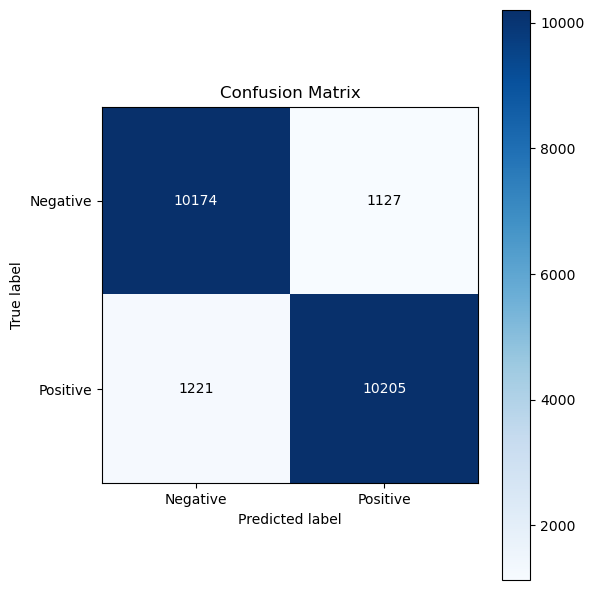

In [26]:
print("Unprocessed")
cm = confusion_matrix(y_test_tfidf_orig, y_pred_LR_orig)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [27]:
y_pred_LR_mini = LR_mini.predict(X_test_tfidf_mini)

In [28]:
print("Minimally processed")
print("Accuracy:", accuracy_score(y_test_tfidf_mini, y_pred_LR_mini))
print("\nClassification Report:\n", classification_report(y_test_tfidf_mini, y_pred_LR_mini, target_names=["negative", "positive"]))

Minimally processed
Accuracy: 0.8967747612971355

Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.90      0.90     11301
    positive       0.90      0.89      0.90     11426

    accuracy                           0.90     22727
   macro avg       0.90      0.90      0.90     22727
weighted avg       0.90      0.90      0.90     22727



Minimally processed


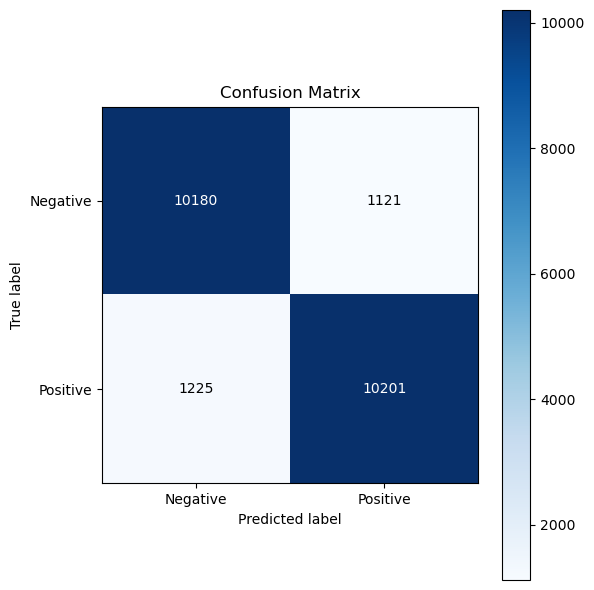

In [36]:
print("Minimally processed")
cm = confusion_matrix(y_test_tfidf_mini, y_pred_LR_mini)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [38]:
y_pred_LR = LR.predict(X_test_tfidf)

In [40]:
print("Maximally processed")
print("Accuracy:", accuracy_score(y_test_tfidf, y_pred_LR))
print("\nClassification Report:\n", classification_report(y_test_tfidf, y_pred_LR, target_names=["negative", "positive"]))


Maximally processed
Accuracy: 0.8885906630879571

Classification Report:
               precision    recall  f1-score   support

    negative       0.88      0.89      0.89     11301
    positive       0.89      0.88      0.89     11426

    accuracy                           0.89     22727
   macro avg       0.89      0.89      0.89     22727
weighted avg       0.89      0.89      0.89     22727



Maximally processed


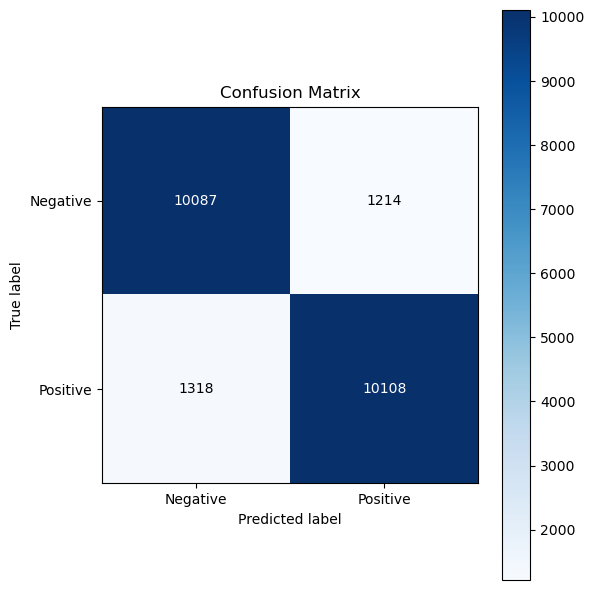

In [42]:
print("Maximally processed")
cm = confusion_matrix(y_test_tfidf, y_pred_LR)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [44]:
# Printing out the prediction results from both process and unprocessed data analysis for further review
df_test_sen['predict_sentiment_unprocessed'] = y_pred_LR_orig
df_test_sen['predict_sentiment_mini_processed'] = y_pred_LR_mini 
df_test_sen['predict_sentiment_processed'] = y_pred_LR 
df_test_sen.to_csv('predicted_sentiment.csv', index=False)

In [46]:
import pickle
pickle.dump(LR_orig, open('LR_orig_model.pkl', 'wb'))
pickle.dump(LR_mini, open('LR_mini_model.pkl', 'wb'))
pickle.dump(LR, open('LR_model.pkl', 'wb'))
pickle.dump(vectorizer_orig, open('vectorizer_orig.pkl', 'wb'))
pickle.dump(vectorizer_mini, open('vectorizer_mini.pkl', 'wb'))
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))